In [ ]:
import kagglehub
brsdincer_star_type_classification_path = kagglehub.dataset_download('brsdincer/star-type-classification')
print('Data source import complete.')

Data source import complete.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.linalg import eigh as sp_eigh
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from mlxtend.plotting import plot_decision_regions

In [ ]:
class LDA:
    def __init__(self, n_components=None):
        self.n_components = n_components

    def fit(self, X, y):
        n_samples, n_features = X.shape
        classes, cls_counts = np.unique(y, return_counts=True)
        priors = cls_counts / n_samples

        X_cls_mean = np.array([X[y == cls].mean(axis=0) for cls in classes])
        between_cls_deviation = X_cls_mean - X.mean(axis=0)
        within_cls_deviation = X - X_cls_mean[y]

        Sb = priors * between_cls_deviation.T @ between_cls_deviation
        Sw = within_cls_deviation.T @ within_cls_deviation / n_samples
        evals, evecs = sp_eigh(Sb, Sw)
        self.dvecs = evecs[:, np.argsort(evals)[::-1]]   # discriminant vectors

        self.weights = X_cls_mean @ self.dvecs @ self.dvecs.T
        self.bias = np.log(priors) - 0.5 * np.diag(X_cls_mean @ self.weights.T)

        if self.n_components is None:
            self.n_components = min(classes.size - 1, n_features)

    def transform(self, X):
        return X @ self.dvecs[:, : self.n_components]

    def predict(self, X_test):
        scores = X_test @ self.weights.T + self.bias

        return np.argmax(scores, axis=1)

In [ ]:
df_path = "/kaggle/input/star-type-classification/Stars.csv"
star_type = pd.read_csv(df_path)
print(star_type.head())

X1, y1 = star_type.iloc[:, :-1], star_type.iloc[:, -1]
cat_features_list = X1.select_dtypes(include=['object']).columns
X1[cat_features_list] = X1[cat_features_list].apply(LabelEncoder().fit_transform)

X1, y1 = X1.values, LabelEncoder().fit_transform(y1)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=0)

   Temperature         L       R    A_M Color Spectral_Class  Type
0         3068  0.002400  0.1700  16.12   Red              M     0
1         3042  0.000500  0.1542  16.60   Red              M     0
2         2600  0.000300  0.1020  18.70   Red              M     0
3         2800  0.000200  0.1600  16.65   Red              M     0
4         1939  0.000138  0.1030  20.06   Red              M     0


In [ ]:
lda = LDA()
lda.fit(X1_train, y1_train)
lda_pred_res = lda.predict(X1_test)
transformed = lda.transform(X1_train)
lda_accuracy = accuracy_score(y1_test, lda_pred_res)

print(f'LDA accuracy: {lda_accuracy}')
print(f'prediction: {lda_pred_res}')
print('Transformed features', transformed[:5].T, sep='\n')

LDA accuracy: 1.0
prediction: [4 1 3 1 4 4 3 4 3 1 1 2 2 3 5 1 0 5 4 0 4 5 2 0 0 2 1 3 1 4 5 4 2 0 2 5 2
 5 0 3 3 4 3 1 4 1 4 0 5 5 0 3 5 1 3 3 5 3 5 4]
Transformed features
[[  6.55221495  -0.8571998    2.16465265 -11.03062098   7.62073549]
 [  3.74443434  -1.09820125   1.2128982    8.75538862   3.88801176]
 [  2.22462072   1.09291992  -0.73431527  -2.47258084  -0.96369278]
 [ -2.78598515  -3.15408968  -4.37644643  -1.18437944  -0.47014263]
 [  3.49749891   5.19757349   4.41467643   5.26540777   2.91398214]]


In [ ]:
sk_lda = LinearDiscriminantAnalysis(solver='eigen')
sk_lda.fit(X1_train, y1_train)
sk_lda_pred_res = sk_lda.predict(X1_test)
sk_transformed = sk_lda.transform(X1_train)
sk_lda_accuracy = accuracy_score(y1_test, sk_lda_pred_res)

print(f'sk LDA accuracy: {sk_lda_accuracy}')
print(f'sk LDA prediction: {sk_lda_pred_res}')
print('sk transformed features', sk_transformed[:5].T, sep='\n')

sk LDA accuracy: 1.0
sk LDA prediction: [4 1 3 1 4 4 3 4 3 1 1 2 2 3 5 1 0 5 4 0 4 5 2 0 0 2 1 3 1 4 5 4 2 0 2 5 2
 5 0 3 3 4 3 1 4 1 4 0 5 5 0 3 5 1 3 3 5 3 5 4]
sk transformed features
[[  6.55221495  -0.8571998    2.16465265 -11.03062098   7.62073549]
 [  3.74443434  -1.09820125   1.2128982    8.75538862   3.88801176]
 [  2.22462072   1.09291992  -0.73431527  -2.47258084  -0.96369278]
 [ -2.78598515  -3.15408968  -4.37644643  -1.18437944  -0.47014263]
 [  3.49749891   5.19757349   4.41467643   5.26540777   2.91398214]]


In [ ]:
lr = LogisticRegression(max_iter=5000)
lr.fit(X1_train, y1_train)
lr_pred_res = lr.predict(X1_test)
lr_accuracy = accuracy_score(y1_test, lr_pred_res)

print(f'sk logistic regression prediction: {lr_pred_res}')
print(f'sk logistic regression accuracy: {lr_accuracy}')

sk logistic regression prediction: [4 1 3 1 4 4 3 4 3 1 1 2 2 3 5 1 0 5 4 0 4 5 2 0 0 2 1 3 1 4 5 4 2 0 2 5 2
 5 0 3 3 4 3 1 4 1 4 0 5 5 0 3 5 1 2 3 5 3 5 4]
sk logistic regression accuracy: 0.9833333333333333


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/usr/local/lib/python3.11/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


<Axes: title={'center': 'LDA surface with original features'}>

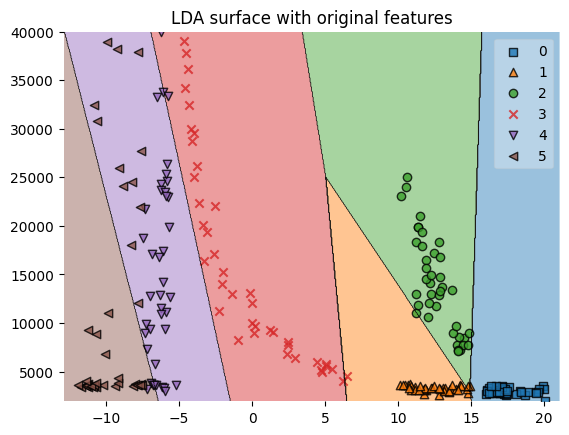

In [ ]:
feature_indexes = [3, 0]
sk_lda1 = LinearDiscriminantAnalysis(solver='eigen')
sk_lda1.fit(X1_train[:, feature_indexes], y1_train)
plt.title('LDA surface with original features')
plot_decision_regions(X=X1[:, feature_indexes], y=y1, clf=sk_lda1)

/usr/local/lib/python3.11/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


<Axes: title={'center': 'LDA surface with transformed features'}>

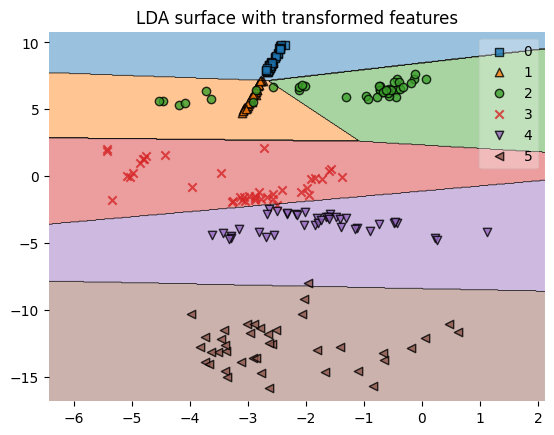

In [ ]:
feature_indexes = [3, 0]
sk_lda2 = LinearDiscriminantAnalysis(solver='eigen')
X1_lda = sk_lda2.fit(X1, y1).transform(X1)
X1_lda = X1_lda[:, feature_indexes]
X1_lda_train, X1_lda_test, y1_train, y1_test = train_test_split(X1_lda, y1, random_state=0)
sk_lda2.fit(X1_lda_train, y1_train)
plt.title('LDA surface with transformed features')
plot_decision_regions(X=X1_lda, y=y1, clf=sk_lda2)